In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE =[224,224]

train_path ='D:/backup2020/deep_learning/clen vs dirty place/clean vs dirty places/train'
valid_path = 'D:/backup2020/deep_learning/clen vs dirty place/clean vs dirty places/valid'

In [3]:
incep = InceptionV3(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [4]:
for layer in incep.layers:
    layer.trainable=False

In [5]:
folder = glob('D:/backup2020/deep_learning/clen vs dirty place/clean vs dirty places/*')

In [6]:
len(folder)

2

In [7]:
x=Flatten()(incep.output)

In [8]:
prediction=Dense(len(folder), activation='sigmoid')(x)

In [9]:
model=Model(inputs=incep.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory('D:/backup2020/deep_learning/clen vs dirty place/clean vs dirty places/train',
                                              target_size=(224,224),
                                              batch_size=4,
                                              class_mode='binary')

Found 1230 images belonging to 2 classes.


In [14]:
test_set=test_datagen.flow_from_directory('D:/backup2020/deep_learning/clen vs dirty place/clean vs dirty places/valid',
                                         target_size=(224,224),
                                         batch_size=4,
                                         class_mode='binary')

Found 285 images belonging to 2 classes.


In [20]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=15)

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
144/308 [=============>................] - ETA: 1:55 - loss: 4.3519 - accuracy: 0.6732

C:\Users\HP\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


308/308 [==============================] - 242s 749ms/step - loss: 3.6856 - accuracy: 0.7179 - val_loss: 9.3519 - val_accuracy: 0.6833
Epoch 2/10
308/308 [==============================] - 224s 729ms/step - loss: 2.2149 - accuracy: 0.8692 - val_loss: 2.3416 - val_accuracy: 0.9000
Epoch 3/10
308/308 [==============================] - 225s 730ms/step - loss: 2.0758 - accuracy: 0.8966 - val_loss: 4.7330 - val_accuracy: 0.8500
Epoch 4/10
308/308 [==============================] - 224s 728ms/step - loss: 2.4882 - accuracy: 0.8885 - val_loss: 4.3488 - val_accuracy: 0.8667
Epoch 5/10
308/308 [==============================] - 227s 738ms/step - loss: 1.5814 - accuracy: 0.9228 - val_loss: 5.1415 - val_accuracy: 0.8833
Epoch 6/10
308/308 [==============================] - 228s 741ms/step - loss: 1.7697 - accuracy: 0.9300 - val_loss: 12.1452 - val_accuracy: 0.8000
Epoch 7/10
308/308 [==============================] - 226s 733ms/step - loss: 1.4123 - accuracy: 0.9312 - val_loss: 4.3077 - val_accur

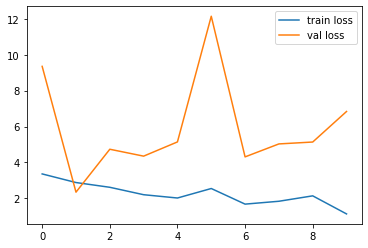

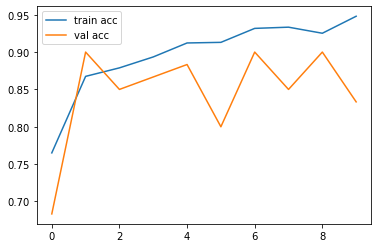

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
model.save('clean_dirty_places.h5')

In [23]:
test_set.class_indicesices

{'clean': 0, 'dirty': 1}